In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [46]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
mpg = sns.load_dataset('mpg')

### 1. Iris

- a.

In [47]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [48]:
setosa = iris[iris.species == 'setosa']
versicolor = iris[iris.species == 'versicolor']
virginica = iris[iris.species == 'virginica']

In [49]:
setosa.describe()

sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

In [50]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
for species in iris.species.unique():
    print(species, "===================================")
    print(iris[iris.species == species].describe())
    print()

setosa ===================================
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

versicolor ===================================
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%      

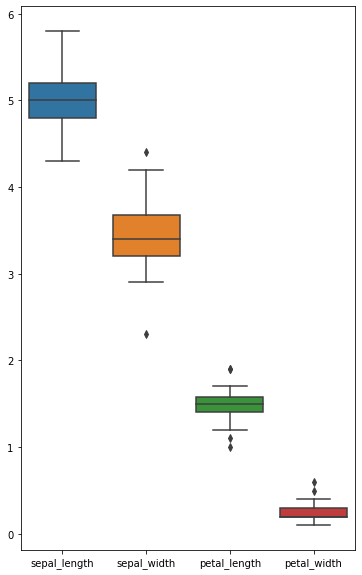

In [52]:
plt.figure(figsize=(6,10))
sns.boxplot(data=iris[iris.species == 'setosa'])
plt.show()

- b. 이상치(Outlier) 제거

In [53]:
s = iris[iris.species == 'setosa']['sepal_width']
q1 = s.quantile(0.25)               # pandas
q3 = np.percentile(s.values, 75)    # numpy
iqr = q3 - q1
q1, q3, iqr

(3.2, 3.6750000000000003, 0.4750000000000001)

In [54]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
s[s < lower_limit] = np.nan
s[s > upper_limit] = np.nan

In [55]:
s.isna().sum()

2

In [56]:
lower_limit, upper_limit

(2.4875, 4.3875)

In [57]:
s.mean(), s.std()

(3.4312500000000004, 0.32034306743094015)

In [58]:
def get_new_stat(s):
    q1 = s.quantile(0.25)               # pandas
    q3 = np.percentile(s.values, 75)    # numpy
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    s[s < lower_limit] = np.nan
    s[s > upper_limit] = np.nan
    return s.mean(), s.std()

In [59]:
get_new_stat(iris[iris.species == 'setosa']['sepal_width'])

(3.4312500000000004, 0.32034306743094015)

<pre>Code Refactoring</pre>

In [60]:
def get_new_stat(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)               
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    s[(s < lower_limit) | (s > upper_limit)] = np.nan
    return s.isna().sum(), s.mean(), s.std()

<pre>12가지 항목</pre>

In [61]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [62]:
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        _, new_mean, new_std = get_new_stat(s)
        print(species, feature, new_mean, new_std)

setosa sepal_length 5.005999999999999 0.3524896872134512
setosa sepal_width 3.4312500000000004 0.32034306743094015
setosa petal_length 1.4608695652173913 0.12906201931985212
setosa petal_width 0.23333333333333328 0.08588298157855664
versicolor sepal_length 5.936 0.5161711470638635
versicolor sepal_width 2.7700000000000005 0.3137983233784114
versicolor petal_length 4.285714285714285 0.4377975178854565
versicolor petal_width 1.3259999999999998 0.197752680004544
virginica sepal_length 6.6224489795918355 0.593459246748267
virginica sepal_width 2.95531914893617 0.26027452951125174
virginica petal_length 5.552 0.5518946956639835
virginica petal_width 2.026 0.27465005563666733


<pre>결과를 데이터 프레임으로 만들기
species, feature, old_mean, old_std, outlier_갯수, new_mean, new_std
</pre>

In [63]:
line = []
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        old_mean, old_std = s.mean(), s.std()
        outlier, new_mean, new_std = get_new_stat(s)
        d = {'species':species, 'feature':feature, 'old_mean':old_mean, 'old_std':old_std,
             'outlier갯수':outlier, 'new_mean':round(new_mean,3), 'new_std':new_std}
        line.append(d)     
df = pd.DataFrame(line)
df      

species       feature  old_mean   old_std  outlier갯수  new_mean  \
0       setosa  sepal_length     5.006  0.352490          0     5.006   
1       setosa   sepal_width     3.428  0.379064          2     3.431   
2       setosa  petal_length     1.462  0.173664          4     1.461   
3       setosa   petal_width     0.246  0.105386          2     0.233   
4   versicolor  sepal_length     5.936  0.516171          0     5.936   
5   versicolor   sepal_width     2.770  0.313798          0     2.770   
6   versicolor  petal_length     4.260  0.469911          1     4.286   
7   versicolor   petal_width     1.326  0.197753          0     1.326   
8    virginica  sepal_length     6.588  0.635880          1     6.622   
9    virginica   sepal_width     2.974  0.322497          3     2.955   
10   virginica  petal_length     5.552  0.551895          0     5.552   
11   virginica   petal_width     2.026  0.274650          0     2.026   

     new_std  
0   0.352490  
1   0.320343  
2   0.129062  
3   0.085883  
4   0.516171  
5   0.313798  
6   0.437798  
7   0.197753  
8   0.593459  
9   0.260275  
10  0.551895  
11  0.274650

In [64]:
# 다중 인덱스
df.set_index(['species', 'feature'], inplace=True)
df

old_mean   old_std  outlier갯수  new_mean   new_std
species    feature                                                        
setosa     sepal_length     5.006  0.352490          0     5.006  0.352490
           sepal_width      3.428  0.379064          2     3.431  0.320343
           petal_length     1.462  0.173664          4     1.461  0.129062
           petal_width      0.246  0.105386          2     0.233  0.085883
versicolor sepal_length     5.936  0.516171          0     5.936  0.516171
           sepal_width      2.770  0.313798          0     2.770  0.313798
           petal_length     4.260  0.469911          1     4.286  0.437798
           petal_width      1.326  0.197753          0     1.326  0.197753
virginica  sepal_length     6.588  0.635880          1     6.622  0.593459
           sepal_width      2.974  0.322497          3     2.955  0.260275
           petal_length     5.552  0.551895          0     5.552  0.551895
           petal_width      2.026  0.274650          0     2.026  0.274650

In [65]:
df.loc['setosa']

old_mean   old_std  outlier갯수  new_mean   new_std
feature                                                        
sepal_length     5.006  0.352490          0     5.006  0.352490
sepal_width      3.428  0.379064          2     3.431  0.320343
petal_length     1.462  0.173664          4     1.461  0.129062
petal_width      0.246  0.105386          2     0.233  0.085883

In [66]:
df.loc[[('setosa','sepal_width')]]

old_mean   old_std  outlier갯수  new_mean   new_std
species feature                                                       
setosa  sepal_width     3.428  0.379064          2     3.431  0.320343

### 2. Titanic

In [70]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

- c. 성별, 선실별, 출발지별 생존율

In [71]:
# 성별 생존율
titanic.groupby('sex')[['survived']].mean()

survived
sex             
female  0.742038
male    0.188908

In [72]:
# 선실별 생존율
titanic.pivot_table('survived','class')

survived
class           
First   0.629630
Second  0.472826
Third   0.242363

In [73]:
# 출발지별 생존율
titanic.pivot_table('survived','embark_town')

survived
embark_town          
Cherbourg    0.553571
Queenstown   0.389610
Southampton  0.336957

In [74]:
# 성별, 선실별 생존율
titanic.pivot_table('survived','sex','class')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

### 3. Mile Per Gallon(MPG)

- a. 배기량 대비 마력 컬럼 추가

In [67]:
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [68]:
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  hp_per_cc  
0          70    usa  chevrolet chevelle malibu   0.423453  
1          70    usa          buick skylark 320   0.471429  
2          70    usa         plymouth satellite   0.471698  
3          70    usa              amc rebel sst   0.493421  
4          70    usa                ford torino   0.463576

- b. manufacture와 model 컬럼 추가

In [69]:
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])
mpg['model'] = mpg.name.apply(lambda x: ' '.join(x.split()[1:]))
mpg.drop(columns=['name'], inplace=True)
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin  hp_per_cc manufacturer            model  
0          70    usa   0.423453    chevrolet  chevelle malibu  
1          70    usa   0.471429        buick      skylark 320  
2          70    usa   0.471698     plymouth        satellite  
3          70    usa   0.493421          amc        rebel sst  
4          70    usa   0.463576         ford           torino